In [1]:

from IPython.core.display import display, HTML

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl 
import numpy as np
import matplotlib.lines as mlines
import matplotlib.colors as mcolors
import ipywidgets as widgets



In [2]:
dfa = pd.read_csv("dfa.csv")
nodes = {}
for row in dfa.iterrows():
    if row[1]["source"] not in nodes:
        nodes[row[1]["source"]] = row[1]["source_name"]
    if row[1]["dest"] not in nodes:
        nodes[row[1]["dest"]] = row[1]["dest_name"]

Create a parallel bar listing source names

i should create a new unique table with only node_id/node name

make a bar that can display all nodes, but only draws those used as a source on that date?

likely node names will need to but cut to a specific length

there will be an issue with print color needing adjustment for dark bg


first
[[0, 5], [0, 76]]
[[0, 5], [6, 54]]
[[0, 5], [7, 55]]
[[0, 5], [9, 46]]
[[0, 5], [16, 27]]
[[0, 5], [16, 14]]
[[0, 5], [28, 68]]
[[0, 5], [36, 85]]
[[0, 5], [37, 62]]
[[0, 5], [40, 10]]
[[0, 5], [40, 5]]
[[0, 5], [40, 3]]
[[0, 5], [56, 87]]
[[0, 5], [60, 76]]
[[0, 5], [73, 53]]
[[0, 5], [75, 49]]
[[0, 5], [86, 59]]
[[0, 5], [88, 53]]
[[0, 5], [89, 3]]
other
[[5, 10], [5, 7]]
[[5, 10], [6, 75]]
[[5, 10], [22, 34]]
[[5, 10], [23, 15]]
[[5, 10], [36, 63]]
[[5, 10], [56, 78]]
[[5, 10], [58, 56]]
[[5, 10], [62, 69]]
[[5, 10], [66, 53]]
[[5, 10], [72, 28]]
[[5, 10], [77, 24]]
[[5, 10], [80, 83]]
[[5, 10], [82, 64]]
[[5, 10], [90, 42]]
[[5, 10], [95, 91]]
[[5, 10], [96, 13]]
[[5, 10], [97, 13]]
[[5, 10], [99, 20]]
[[5, 10], [99, 85]]
other
[[10, 15], [3, 10]]
[[10, 15], [10, 87]]
[[10, 15], [10, 34]]
[[10, 15], [12, 8]]
[[10, 15], [14, 26]]
[[10, 15], [17, 55]]
[[10, 15], [18, 24]]
[[10, 15], [19, 10]]
[[10, 15], [32, 26]]
[[10, 15], [33, 24]]
[[10, 15], [37, 18]]
[[10, 15], [38, 16]]
[

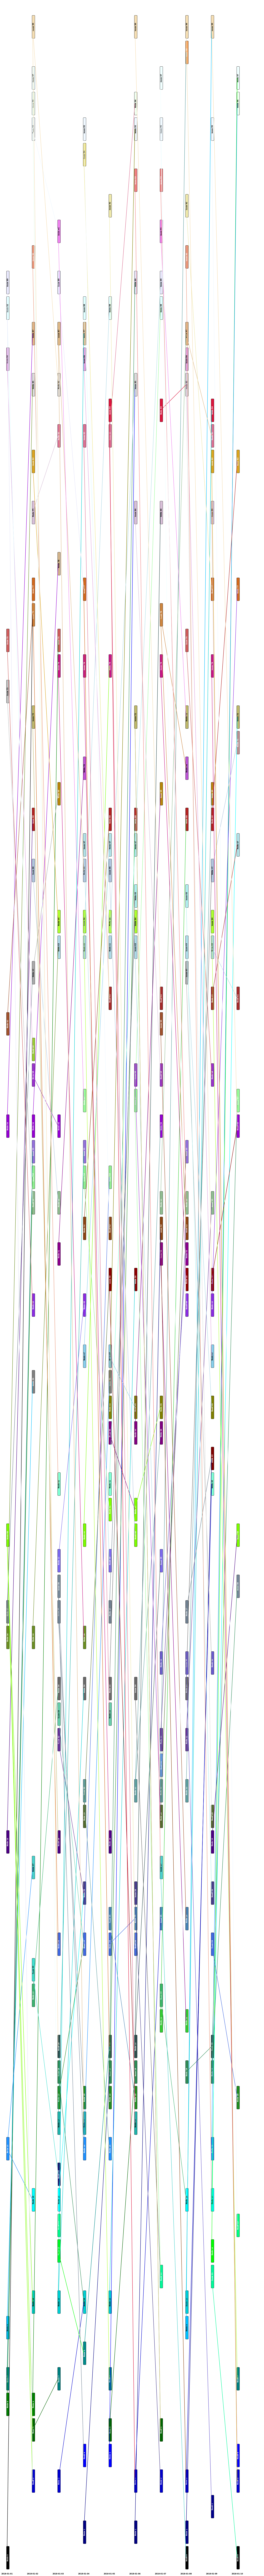

In [65]:
def draw_nodes(dt, align_x, nodes, current_src):
    L = len(nodes)
    centers = []
    for i in range(L):
        rgb = mcolors.to_rgb(colors[i])
 
        if sum([1 for i in rgb if i <.65]) > 1:
            c = "white"
        else:
            c = "black"
        if i not in current_src:
            bgcolor = "white"
            c = "white"
            ecolor = "white"
        else:
            bgcolor = colors[i]
            ecolor = "black"
            centers.append([align_x,4*i])
        props = dict(boxstyle='round', facecolor=bgcolor, edgecolor=ecolor)
        node_name = nodes[i][:24]
        d = (30 - len(node_name))//2
        padding = "".join([" " for _ in range(d)] )
        pnode_name = padding+node_name+padding
        plt.annotate(pnode_name, (align_x,i) , fontweight='bold',  bbox=props, color=c, verticalalignment="center", horizontalalignment="left", rotation=90)
    plt.text(align_x, -.65, dt, fontweight='bold', horizontalalignment="center")
    return centers

def draw_connections(df, col1, col2):
    grp = df.groupby(col1)
    for g in grp:
        x1 = cnt 
        x2 = x1 + 5
        y1 = g[0]
        y2 = g[1][col2]
        for i in y2:
            print([[x1,x2], [y1,i]])
            l = mlines.Line2D([x1,x2], [y1,i], zorder=5, lw=2, color=colors[g[0]])
            axs.add_line(l)



colors = list(mcolors.cnames.values()) 
colors = list(set([i for i in colors if int(i[1:], 16) < int('0xfcfcfc', 16)]))
colors.sort()

L = len(nodes)

plt.rcParams['figure.figsize'] = 20, 200
fig, axs = plt.subplots(1)
plt.subplots_adjust(0, 0, 1, 1, 0,0)
axes = plt.gca()
axes.set_xlim([0, 50])
axes.set_ylim([0, L])
plt.axis('off')            
            
dts = list(dfa["date"].unique())    
dts.sort()
tss = dts[:10]

cnt = 0

for dt in tss: 
    df = dfa[dfa["date"]  == dt]
    if cnt == 0:
        print("first")
        current_src = list(df["source"].unique())
    else: 
        if tss.index(dt) == len(tss)-1:
            print("last")
            current_src =  list(dfa[dfa["date"]  == tss[cnt//5 - 1]]["dest"].unique())
        else:
            print("other")
            current_src = list(df["source"].unique()) + list(dfa[dfa["date"]  == tss[cnt//5 - 1]]["dest"].unique())
    align_x = cnt
    c = draw_nodes(dt, align_x, nodes, current_src)
    if tss.index(dt) < len(tss)-1:
         draw_connections(df, "source", "dest")
        




    cnt += 5


'3.7.6 (default, Jan  8 2020, 13:42:34) \n[Clang 4.0.1 (tags/RELEASE_401/final)]'